In [1]:
from osgeo import gdal, gdal_array
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import utm

In [2]:
data=gdal.Open(r"C:\\Landsat8\LC08_L1TP_145045_20191014_20191018_01_T1_B4.tif")
b4=data.GetRasterBand(1)
red=b4.ReadAsArray()
red.shape

(7691, 7531)

In [3]:
red=red[2000:3000,2000:3000]
red

array([[8357, 8082, 8054, ..., 8040, 7897, 8227],
       [8465, 8087, 8047, ..., 7667, 7785, 8412],
       [7979, 7932, 8015, ..., 7553, 7847, 7818],
       ...,
       [7389, 7394, 7378, ..., 8379, 8202, 8176],
       [7442, 7436, 7357, ..., 8174, 8380, 8233],
       [7377, 7200, 7139, ..., 8336, 8523, 8270]], dtype=uint16)

In [4]:
data=gdal.Open(r"C:\\Landsat8\LC08_L1TP_145045_20191014_20191018_01_T1_B3.tif")
b3=data.GetRasterBand(1)
green=b3.ReadAsArray()
green=green[2000:3000,2000:3000]

data=gdal.Open(r"C:\\Landsat8\LC08_L1TP_145045_20191014_20191018_01_T1_B2.tif")
b2=data.GetRasterBand(1)
blue=b2.ReadAsArray()
blue=blue[2000:3000,2000:3000]

data=gdal.Open(r"C:\\Landsat8\LC08_L1TP_145045_20191014_20191018_01_T1_B5.tif")
b5=data.GetRasterBand(1)
NIR=b5.ReadAsArray()
#NIR=NIR[2000:4000,2000:4000]


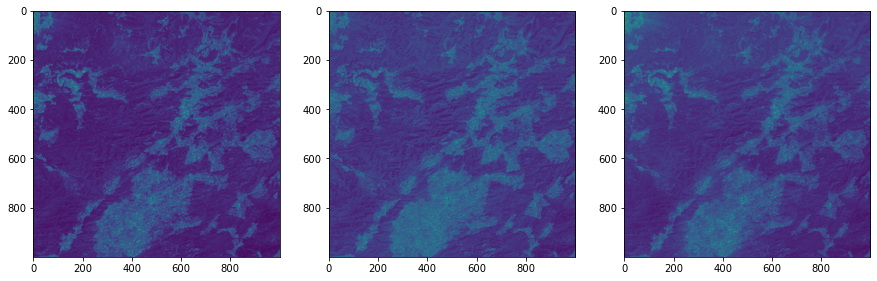

In [5]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,15))


ax1.imshow(red)
ax2.imshow(green)
ax3.imshow(blue)

In [6]:
print(red.min(),green.min(),blue.min())
print(red.max(),green.max(),blue.max())

6766 7706 8680
11988 11740 10758


In [7]:
rgb=np.dstack((blue,green,red)).astype("uint8")
rgb.min(),rgb.max(),rgb.shape

(0, 255, (1000, 1000, 3))

In [8]:
r=rgb[:,:,0]
g=rgb[:,:,1]
b=rgb[:,:,2]


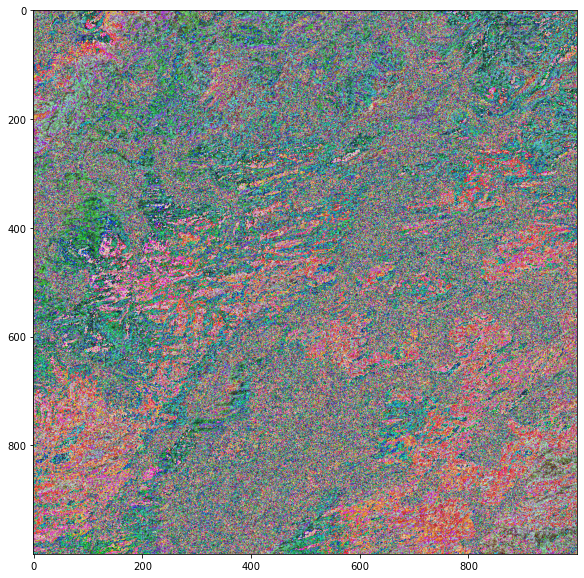

In [9]:
fig,(ax1)=plt.subplots(1,1,figsize=(10,10))
ax1.imshow(rgb)
#ax2.imshow(red,cmap='gray')

In [10]:
geo=data.GetGeoTransform()
geo

(665985.0, 30.0, 0.0, 2513715.0, 0.0, -30.0)

In [11]:
proj=data.GetProjection()
proj

'PROJCS["WGS 84 / UTM zone 43N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32643"]]'

In [12]:
b=gdal.Open(r"C:\\Landsat8\new_cutB4.tif")
b1=b.GetRasterBand(1)
b2=b1.ReadAsArray()
b2.shape

(2000, 2000)

In [13]:
g=b.GetGeoTransform()
g
s=(725985,g[1],g[2],2393715,g[4],g[5])
s

(725985, 30.0, 0.0, 2393715, 0.0, -30.0)

In [14]:
b.GetProjection()

'PROJCS["WGS 84 / UTM zone 43N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32643"]]'

In [19]:
def clip_image():
    from osgeo import gdal
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import patches
    
    ###########INPUTS##########
    source_image_path=str(input("please provide sorce image(tif file) path "))
    outputpath=str(input("please provide output(save) location "))
    a=int(input("min row from where clip start  "))
    b=int(input("max row up to clip end  "))
    c=int(input("min column from where clip start  "))
    d=int(input("max row up to clip end  "))
    print(a,b,c,d)

    Ipath=source_image_path+'.tif'
    data=gdal.Open(Ipath)
    band=data.GetRasterBand(1).ReadAsArray()
    clip=band[a:b,c:d]
    shape=clip.shape
    
    ##visualization
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,12))
    rect=patches.Rectangle((a,b),d-c,a-b,edgecolor='r', facecolor="none")

    im1=ax1.imshow(band,"gray")
    ax1.add_patch(rect)
    im2=ax2.imshow(clip)
 

    
    ##set projection and geotransformation and save as tif file
    geo=data.GetGeoTransform()
    proj=data.GetProjection()
    
    geoclip=(geo[0]+c*geo[1],geo[1],geo[2],geo[3]+a*geo[5],geo[4],geo[5])
    projclip=proj
    
    
    driver=gdal.GetDriverByName("GTiff")
    Opath=outputpath+'\clipimage'+source_image_path[-2:]+'.tif'
    ds=driver.Create(Opath,shape[1],shape[0], 1,gdal.GDT_Float32)
    ds.SetProjection(projclip)
    ds.SetGeoTransform(geoclip)
    ds.GetRasterBand(1).WriteArray(clip)
    
    return clip, Opath

In [16]:
source_path='C:\\Landsat8\LC08_L1TP_145045_20191014_20191018_01_T1_B3'
outpath="C:\\Landsat8"
minrow=int(input("min row from where clip start  "))
maxrow=int(input("max row up to clip end  "))
mincol=int(input("min column from where clip start  "))
maxcol=int(input("max row up to clip end  "))



min row from where clip start  2000
max row up to clip end  4000
min column from where clip start  2000
max row up to clip end  4000


please provide sorce image(tif file) path C:\\Landsat8\LC08_L1TP_145045_20191014_20191018_01_T1_B8
please provide output(save) location C:\\Landsat8
min row from where clip start  3000
max row up to clip end  6000
min column from where clip start  3000
max row up to clip end  6000
3000 6000 3000 6000


(array([[9112, 9219, 9092, ..., 7755, 7761, 7986],
        [9124, 9217, 9066, ..., 7789, 7879, 7976],
        [9050, 9091, 9049, ..., 7903, 7920, 7934],
        ...,
        [8026, 7986, 7999, ..., 8604, 8525, 8518],
        [7952, 8009, 8045, ..., 8665, 8623, 8530],
        [7798, 8054, 8087, ..., 8603, 8577, 8559]], dtype=uint16),
 'C:\\\\Landsat8\\clipimageB8.tif')

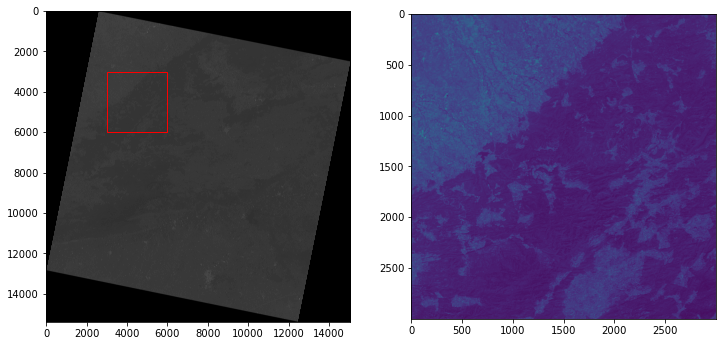

In [22]:
clip_image()

# UTM conversion

In [18]:
def pixel2utm(ds, x, y):
    """
    Returns utm coordinates from pixel x, y coords
    """
    xoff, a, b, yoff, d, e = ds.GetGeoTransform()
    xp = a * x + b * y + xoff
    yp = d * x + e * y + yoff
    return(xp, yp)
    

In [25]:
pos = [3000,4000] # this is the pixel we want info abou
ds = gdal.Open("C:\\Landsat8\LC08_L1TP_145045_20191014_20191018_01_T1_B4.tif")
# take the GDAL info and make it into UTM
my_utm = pixel2utm(ds,pos[0],pos[1])
my_lla = utm.to_latlon(my_utm[0],my_utm[1],43,"N")

In [26]:
my_utm,my_lla

((755985.0, 2393715.0), (21.628227696621604, 77.47301820744865))

In [38]:
reff=ds.GetProjection()
i = reff.find("UTM")
print(reff,"\n")
print(reff[i:i+12])

PROJCS["WGS 84 / UTM zone 43N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32643"]] 

UTM zone 43N
